In [127]:
import pickle as pkl
import numpy as np
from scipy.stats import norm
import random

In [113]:
with open("dover_predictions/val-custom_mp4.pkl","rb") as f:
    yfcc_part1 = pkl.load(f)

with open("dover_predictions/val-custom_mp4_r.pkl","rb") as f:
    yfcc_part2 = pkl.load(f)
    
yfcc_part1.update(yfcc_part2)
yfcc = yfcc_part1


with open("dover_predictions/dover_k400_train.pkl","rb") as f:
    k400_train = pkl.load(f)
    
with open("dover_predictions/dover_k400_val.pkl","rb") as f:
    k400_val = pkl.load(f)
    
k400_train.update(k400_val)
k400 = k400_train

In [140]:
names_yfcc, technical_yfcc, aesthetic_yfcc = [], [], []
for key, value in yfcc.items():
    technical_yfcc += [value['technical']]
    aesthetic_yfcc += [value['aesthetic']]
    names_yfcc += [key]
    
names_k400, technical_k400, aesthetic_k400 = [], [], []
for key, value in k400.items():
    technical_k400 += [value['technical']]
    aesthetic_k400 += [value['aesthetic']]
    names_k400 += [key]

In [141]:
from matplotlib import pyplot as plt

def rescale(pr, gt=None):
    if gt is None:
        print(np.mean(pr), np.std(pr))
        pr = (pr - np.mean(pr)) / np.std(pr)
    else:
        print(np.mean(pr), np.std(pr), np.std(gt), np.mean(gt))
        pr = ((pr - np.mean(pr)) / np.std(pr)) * np.std(gt) + np.mean(gt)
    return pr

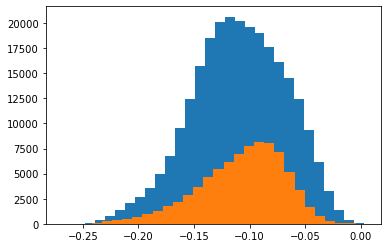

In [142]:
u_k_t, bars_k, _ = plt.hist(technical_k400, bins=30) 
u_y_t, bars_y, _ = plt.hist(technical_yfcc, bins=30) 

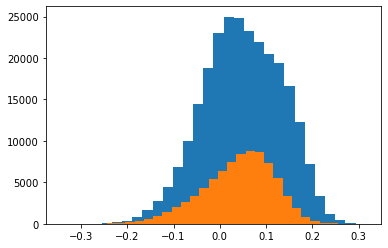

In [143]:
u_k_a, bars_k, _ = plt.hist(aesthetic_k400, bins=30) 
u_y_a, bars_y, _ = plt.hist(aesthetic_yfcc, bins=30) 

In [144]:
def norm_samplers(length, total_size=1000):
    #return np.array(range(length)) / length * 100
    l = []
    for i in range(1,length):
        l.append(norm.pdf(i/length*6-3))
    l = np.array(l)
    return (l / l.sum() * total_size).astype(np.int64)

In [145]:
sampler_k = norm_samplers(31,600)
sampler_y = norm_samplers(31,800)

In [148]:
sampled_names_yfcc = []

name_yfcc, technical_yfcc, aesthetic_yfcc = zip(*sorted(zip(names_yfcc, technical_yfcc, aesthetic_yfcc),key=lambda x:x[1]))

start = 0
for i, ui in enumerate(u_y_t):
    ui = int(ui)
    sampled_names_yfcc += random.sample(names_yfcc[start:start+ui], sampler_y[i])
    start = start + ui
    
    
names_yfcc, technical_yfcc, aesthetic_yfcc = zip(*sorted(zip(names_yfcc, technical_yfcc, aesthetic_yfcc),key=lambda x:x[1]))


start = 0
for i, ui in enumerate(u_y_a):
    ui = int(ui)
    sampled_names_yfcc += random.sample(names_yfcc[start:start+ui], sampler_y[i])
    start = start + ui
    
sampled_names_yfcc = list(np.unique(sampled_names_yfcc))


In [154]:
sampled_names_k400 = []

name_k400, technical_k400, aesthetic_k400 = zip(*sorted(zip(names_k400, technical_k400, aesthetic_k400),key=lambda x:x[1]))

start = 0
for i, ui in enumerate(u_y_t):
    ui = int(ui)
    sampled_names_k400 += random.sample(names_k400[start:start+ui], sampler_k[i])
    start = start + ui
    
    
names_k400, technical_k400, aesthetic_k400 = zip(*sorted(zip(names_k400, technical_k400, aesthetic_k400),key=lambda x:x[1]))


start = 0
for i, ui in enumerate(u_y_a):
    ui = int(ui)
    sampled_names_k400 += random.sample(names_k400[start:start+ui], sampler_k[i])
    start = start + ui
    
sampled_names_k400 = list(np.unique(sampled_names_k400))

In [156]:
len(sampled_names_yfcc)

1566

In [158]:
with open("names_for_annotation.pkl","wb") as f:
    pkl.dump({"yfcc": sampled_names_yfcc, "k400": sampled_names_k400}, f)